### 1) Import Necessary Libraries

In [217]:
# data analysis libraries:
import numpy as np
import pandas as pd

# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings:
import warnings
warnings.filterwarnings('ignore')

# # to display all columns:
# pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split, GridSearchCV

### 2) Read in and Explore the Data

In [218]:
#import train and test CSV files
train = pd.read_csv("C:\\Users\\ASUS\\DSMLBC\\titanic_compitition\\train.csv")
test = pd.read_csv("C:\\Users\\ASUS\\DSMLBC\\titanic_compitition\\test.csv")
#create a copy train
df= train.copy()

#create a combined group of both datasets
combine = [df, test]

### 3) Data Analysis

In [3]:
#take a look at the training data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [4]:
(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Some Observations:
1. There are a total of 891 passengers in our training set.
2. The Age feature is missing approximately 19.8% of its values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
3. The Cabin feature is missing approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
4. The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [108]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [109]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Some Predictions:
1. Sex: Females are more likely to survive.
2. SibSp/Parch: People traveling alone are more likely to survive.
3. Age: Maybe young children are more likely to survive. Maybe it is not important.
4. Pclass: People of higher socioeconomic class are more likely to survive.
5. Embarked: It is observed that most of the survivors boarded from the S port.
6. Fare: I mean its very important.

In [8]:
print(df['Pclass'].value_counts())
print(df['SibSp'].value_counts())
print(df['Parch'].value_counts())
print(df['Embarked'].value_counts())
print(df['Sex'].value_counts())
print(df['Ticket'].value_counts())
print(df['Cabin'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
CA. 2343             7
1601                 7
347082               7
3101295              6
CA 2144              6
                    ..
31028                1
324669               1
STON/O 2. 3101286    1
2650                 1
PC 17595             1
Name: Ticket, Length: 681, dtype: int64
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
A23            1
C7             1
D15            1
A24            1
B42            1
Name: Cabin, Length: 147, dtype: int64


## 4)Data Visualization

#### Sex Feature

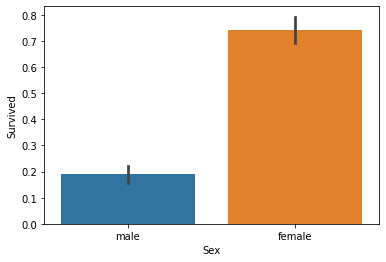

In [9]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=df);

As predicted, females have a much higher chance of survival than males. The Sex feature is essential in our predictions.

#### Pclass Feature

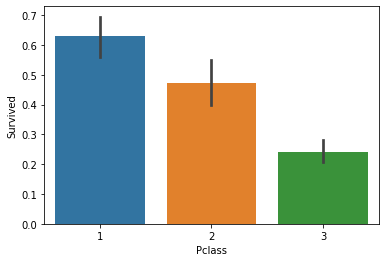

In [10]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=df);

As predicted, people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)

#### SibSp Feature

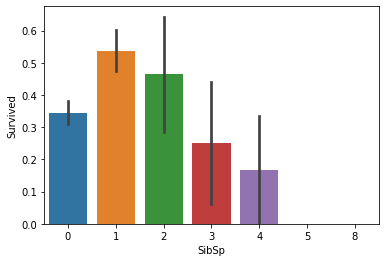

In [31]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df);

In [27]:
df.groupby('SibSp')['PassengerId'].count()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: PassengerId, dtype: int64

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)

#### Parch Feature

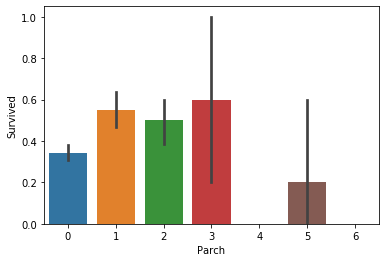

In [30]:
sns.barplot(x="Parch", y="Survived", data=df)
plt.show()

In [9]:
df.groupby('Parch')['PassengerId'].count()

Parch
0    678
1    118
2     80
3     15
Name: PassengerId, dtype: int64

#### Fare Feature

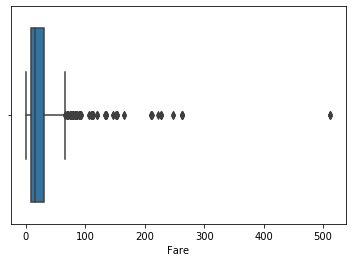

In [17]:
sns.boxplot(x = df['Fare']);

### 5) Cleaning Data & Outlier Treatment & Feature Engeneering & Predict Missing Values

Time to clean our data to account for missing values and unnecessary information!

let's see how our test data looks!

In [19]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,AgeGroup
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418,418.000000,332
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,NaN,3
top,NaN,NaN,"Wick, Mr. George Dennick",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,NaN,notchild
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,NaN,312
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN,1.839713,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN,1.519072,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,1.000000,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN,2.000000,NaN


- We have a total of 418 passengers.
- 1 value from the Fare feature is missing.
- Around 20.5% of the Age feature is missing, we will need to fill that in.

#### Parch Feature

The number of people with two or more children or parents is very low in the data. Adding them separately to the algorithm can lead to misleading results. So I decided to examine three or more people as a single class.

Besides I accept the Pclass variable as a categorical ordinal variable.

In [219]:
df['Parch'] =  df['Parch'].replace([df.loc[df.Parch>2,'Parch'].values], 3)
test['Parch'] =  test['Parch'].replace([df.loc[df.Parch>2,'Parch'].values], 3)

In [220]:
from pandas.api.types import CategoricalDtype 
df['Parch'] = df['Parch'].astype(CategoricalDtype(ordered = True))
test['Parch'] = test['Parch'].astype(CategoricalDtype(ordered = True))

In [158]:
df.groupby(['Parch'])['PassengerId'].count()

Parch
0    678
1    118
2     80
3     15
Name: PassengerId, dtype: int64

#### SibSp Feature

The number of people with two or more siblings or spouses in the data is very low. Adding them separately to the algorithm can lead to misleading results. So I decided to examine three or more people as a single class.

I accept the SibSp variable as a categorical ordinal variable.

In [14]:
test.groupby(['SibSp'])['PassengerId'].count()

SibSp
0    283
1    110
2     14
3      4
4      4
5      1
8      2
Name: PassengerId, dtype: int64

In [221]:
df['SibSp'] =  df['SibSp'].replace([df.loc[df.SibSp>2,'SibSp'].values], 3)
test['SibSp'] =  test['SibSp'].replace([df.loc[df.SibSp>2,'SibSp'].values], 3)

In [222]:
df['SibSp'] = df['SibSp'].astype(CategoricalDtype(ordered = True))
test['SibSp'] = test['SibSp'].astype(CategoricalDtype(ordered = True))

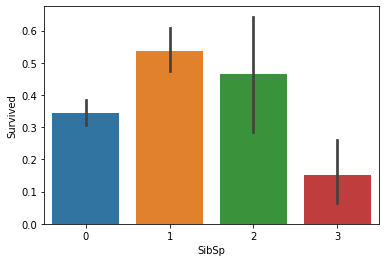

In [161]:
sns.barplot(x="SibSp", y="Survived", data=df);

#### Cabin Feature

I think the idea here is that people with recorded cabin numbers are of higher socioeconomic class, and thus more likely to survive. Therefore, I think that the cabin and Pclass columns contain the same information.And the cabin column does not express meaningful information by itself. So I drop it.

In [22]:
df[df.Cabin.notnull()].groupby('Pclass')['PassengerId'].count()

Pclass
1    176
2     16
3     12
Name: PassengerId, dtype: int64

In [223]:
df = df.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

#### Ticket Feature

In [224]:
#we can also drop the Ticket feature since it's unlikely to yield any useful information
df = df.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

#### Embarked Feature

It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [225]:
#now we need to fill in the missing values in the Embarked feature

df['Embarked'].fillna(df.Embarked.mode()[0], inplace = True)


#### Fare Feature

I noticed that there are outliers in the Fare variable. I made a few observations below to be able to optimize them. I tried to organize these outliers in the most reasonable way in line with my own ideas.

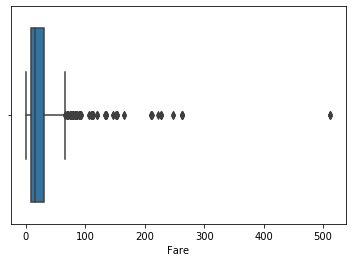

In [14]:
# It looks like there is a problem in Fare max data. Visualize with boxplot.
sns.boxplot(x = df['Fare']);

In [219]:
Q1 = train['Fare'].quantile(0.25)
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1- 1.5*IQR
print(lower_limit)

upper_limit = Q3 + 1.5*IQR
print(upper_limit)

print(df[df.Fare<upper_limit]['Fare'].describe())
print(df[df.Fare>upper_limit]['Fare'].describe())
print(df[df.Fare<150]['Fare'].describe())
print(df[df.Fare>150]['Fare'].describe())

-26.724
65.6344
count    775.000000
mean      17.822091
std       13.578085
min        0.000000
25%        7.895800
50%       13.000000
75%       26.000000
max       65.000000
Name: Fare, dtype: float64
count    116.000000
mean     128.291629
std       84.636908
min       66.600000
25%       78.189600
50%       90.000000
75%      147.778100
max      512.329200
Name: Fare, dtype: float64
count    882.000000
mean      29.002508
std       36.569302
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
max      247.520800
Name: Fare, dtype: float64
count      9.000000
mean     345.970844
std      124.769028
min      262.375000
25%      263.000000
50%      263.000000
75%      512.329200
max      512.329200
Name: Fare, dtype: float64


It's time separate the fare values into some logical groups as well as filling in the single missing value in the test dataset.

In [226]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = df[df.Pclass==pclass]['Fare'].median()

        
# I replace values greater than 150 with the median of values greater than 150.

df['Fare'] = df['Fare'].replace(df[df.Fare>150]['Fare'], df[df.Fare>150]['Fare'].median())
test['Fare'] = test['Fare'].replace(test[test.Fare>150]['Fare'], test[test.Fare>150]['Fare'].median())


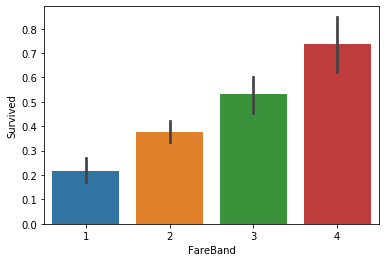

In [227]:
# df['FareBand'] = pd.qcut(df['Fare'], 4, labels = [1, 2, 3,4])
# test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3,4])


binss = [-1,8, 31, 100,np.inf]
labelss = [ 1,2,3,4]
df['FareBand'] = pd.cut(df["Fare"], binss, labels = labelss)
test['FareBand'] = pd.cut(test["Fare"], binss, labels = labelss)


df['FareBand'] = df['FareBand'].astype(CategoricalDtype(ordered = True))
test['FareBand'] = test['FareBand'].astype(CategoricalDtype(ordered = True))

sns.barplot(x="FareBand", y="Survived", data=df)
plt.show()

In [196]:
df.groupby('FareBand')['Fare'].mean()

FareBand
1      7.100707
2     17.047176
3     65.823812
4    227.525000
Name: Fare, dtype: float64

#### Title Feature

In [228]:
#extract a title for each Name in the train and test datasets
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) 

pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [229]:
#replace various titles with more common names

#for df
df['Title'] = df['Title'].replace(['Lady', 'Capt', 'Col', 'Don',
                                                 'Dr', 'Major', 'Rev', 'Jonkheer', 
                                                 'Dona','Countess', 'Lady', 'Master',
                                                 'Sir'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'],'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
#for test    
test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col', 'Don',
                                                 'Dr', 'Major', 'Rev', 'Jonkheer', 
                                                 'Dona','Countess', 'Lady', 'Master',
                                                 'Sir'], 'Rare')
test['Title'] =test['Title'].replace(['Mlle', 'Ms'],'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')


df.Title = pd.Categorical(df.Title)
test.Title = pd.Categorical(test.Title)    

df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Miss,0.702703
1,Mr,0.156673
2,Mrs,0.793651
3,Rare,0.492063


#### Age Feature

Next we'll fill in the missing values in the Age feature. Since a higher percentage of values are missing, it would be illogical to fill all of them with the same value (as we did with Embarked). Instead, let's try to find a way to predict the missing ages.

I obtained a median age value by grouping some information of people with age information. Then, I tried to make a prediction by matching the information I grouped with the information of the people whose age is empty. I assigned a median value to several units that I couldn't guess.

In [17]:
#I tried to choose the ones that gave the most optimum result.

age_guess = pd.DataFrame(df.groupby(['Title','SibSp','Pclass','Parch','FareBand','Embarked'], as_index=False)['Age'].median())
df_age_new = df.merge(age_guess, on =['Title','SibSp','Pclass','Parch' ,'FareBand','Embarked'], how='inner')
df_age_new['AgeErrors'] = (df_age_new['Age_x']-df_age_new['Age_y']).abs()
df_age_new['AgeErrors'].describe()

count    714.000000
mean       6.151022
std        7.112365
min        0.000000
25%        1.000000
50%        4.000000
75%        8.687500
max       48.000000
Name: AgeErrors, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age_x,SibSp,Parch,Fare,Embarked,FareBand,Title,Age_y,AgeErrors
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Mr,23.5,1.5
1,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,6.4958,S,1,Mr,23.5,5.5
2,443,0,3,"Petterson, Mr. Johan Emil",male,25.0,1,0,7.7750,S,1,Mr,23.5,1.5
3,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,7.0458,S,1,Mr,23.5,5.5
4,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,1,Mr,23.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,227.5250,S,4,Mrs,45.0,0.0
885,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,25.9292,S,2,Mrs,48.0,0.0
886,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,13.8583,C,2,Miss,27.0,0.0
887,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,2,29.1250,Q,2,Mrs,39.0,0.0


In [230]:
null_Age = df.drop(df[df.Age.notnull()].index, axis=0)
notnull_Age = df.drop(df[df.Age.isnull()].index, axis=0)

age_guess = pd.DataFrame(df.groupby(['Title','SibSp','Pclass','Parch' ,'FareBand','Embarked'], as_index=False)['Age'].median())
null_Age = null_Age.merge(age_guess, on =['Title','SibSp','Pclass', 'Parch','FareBand','Embarked'], how='inner')

null_Age['Age_y']= null_Age['Age_y'].fillna(null_Age['Age_y'].median())

null_Age= null_Age.drop('Age_x', axis=1 ).rename(columns= {"Age_y": "Age"})
df = pd.concat([null_Age,notnull_Age], axis=0, ignore_index = True)

In [231]:
null_Age = test.drop(test[test.Age.notnull()].index, axis=0)
notnull_Age = test.drop(test[test.Age.isnull()].index, axis=0)

age_guess = pd.DataFrame(test.groupby(['Title','SibSp','Pclass','Parch' ,'FareBand','Embarked'], as_index=False)['Age'].median())
null_Age = null_Age.merge(age_guess, on =['Title','SibSp','Pclass', 'Parch','FareBand','Embarked'], how='inner')

null_Age['Age_y']= null_Age['Age_y'].fillna(null_Age['Age_y'].median())

null_Age= null_Age.drop('Age_x', axis=1 ).rename(columns= {"Age_y": "Age"})
test = pd.concat([null_Age,notnull_Age], axis=0, ignore_index = True)

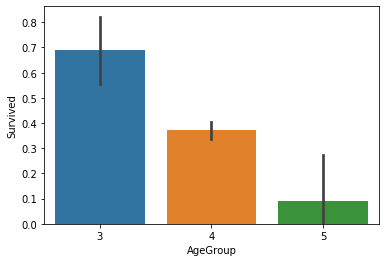

In [232]:
#sort the ages into logical categories

bins = [0, 5,  64,  np.inf]
labels = [3,4,5]
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)


df['AgeGroup'] = df['AgeGroup'].astype(CategoricalDtype(ordered = True))
test['AgeGroup'] = test['AgeGroup'].astype(CategoricalDtype(ordered = True))

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.show()

Babies are more likely to survive than any other age group. However, seniors is unlucky than other groups to survive.

#### Name Feature
We can drop the name feature now that we've extracted the titles.

In [233]:
#drop the name feature since it contains no more useful information.
df = df.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

#### Fare Features

I dropped it because the Fare column reduces the success values of the algorithms.

In [234]:
df = df.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

#### One-Hot Encoding

I converted non ordinal categorical variables to dummy variables. In doing so, I dropped the variables containing the same information to avoid falling into the dummy variable trap.

In [235]:
df = pd.get_dummies(df, columns = ["Pclass"], prefix = ["Pclass"], drop_first= True)
test = pd.get_dummies(test, columns = ["Pclass"], prefix = ["Pclass"], drop_first= True)

In [236]:
df = pd.get_dummies(df, columns = ["Embarked"], prefix = ["Embarked"], drop_first= True)
test = pd.get_dummies(test, columns = ["Embarked"], prefix = ["Embarked"], drop_first= True)

In [237]:
df = pd.get_dummies(df, columns = ["Title"], prefix = ["Title"], drop_first= True)
test = pd.get_dummies(test, columns = ["Title"], prefix = ["Title"], drop_first= True)

In [238]:
df = pd.get_dummies(df, columns = ["Sex"], prefix = ["Sex"], drop_first= True)
test = pd.get_dummies(test, columns = ["Sex"], prefix = ["Sex"], drop_first= True)

### 6) Modeling, Evaluation and Model Tuning

#### Splitting the Training Data
We will use part of our training data (22% in this case) to test the accuracy of our different models.

In [239]:
from sklearn.model_selection import train_test_split

predictors = df.drop(['Survived', 'PassengerId'], axis=1)
target = df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

Testing Different Models
I will be testing the following models with my training data (got the list from here):

- Logistic Regression
- Support Vector Machines
- Linear SVC
- Stochastic Gradient Descent
- Multiple Layer Perceptron

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [240]:
# Logistic Regression82.74
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

83.25


In [241]:
# Support Vector Machines82.23,
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

83.25


In [242]:
# Linear SVC 82.23, 62.44
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

80.71


In [243]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

84.26


In [244]:
#MLPClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_val)

mlpc = MLPClassifier().fit(X_train_scaled, y_train)
y_pred = mlpc.predict(X_test_scaled)
acc_mlpc = round(accuracy_score(y_val, y_pred)*100, 2)
print(acc_mlpc)

85.79


### Let's compare the accuracies of each model!

In [245]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines',  'Logistic Regression', 
               'Linear SVC',  'MLPClassifier' ,'Stochastic Gradient Descent'],
    'Score': [acc_svc, acc_logreg, 
              acc_linear_svc,acc_mlpc,
              acc_sgd]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,MLPClassifier,85.79
4,Stochastic Gradient Descent,84.26
0,Support Vector Machines,83.25
1,Logistic Regression,83.25
2,Linear SVC,80.71


I decided to use the Multiple Layer Perceptron model for the testing data.

### 7) Creating Submission File

It's time to create a submission.csv file to upload to the Kaggle competition!

In [148]:
#set ids as PassengerId and predict survival 
ids = test['PassengerId']
predictions = mlpc.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission33.csv', index=False)